In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0c0f7298733c448899ca9495d47c97de',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-11-30T04:36:34.581Z', 'error_code': 0, 'error_message': None, 'elapsed': 70, 'credit_count': 25, 'notice': None, 'total_count': 9103}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12489, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [3]:
import pandas as pd

#See all columns
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
#Normalizes data
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

id                  name  symbol             slug  num_market_pairs  \
0         1               Bitcoin     BTC          bitcoin             12489   
1      1027              Ethereum     ETH         ethereum             11215   
2       825           Tether USDt    USDT           tether            160244   
3        52                   XRP     XRP              xrp              1763   
4      1839                   BNB     BNB              bnb              2979   
...     ...                   ...     ...              ...               ...   
4995  38759              Shih Tzu    SHIH          shihtzu                 4   
4996  10585       TrustFi Network     TFI  trustfi-network                 9   
4997  22421         BULL BTC CLUB     BBC    bull-btc-club                20   
4998  25490  SEED NFT Marketplace    SEED       seed-photo                19   
4999  31082                Boomer  BOOMER           boomer                21   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2013-08-04T00:00:00.000Z   
4     2017-07-25T00:00:00.000Z   
...                        ...   
4995  2025-10-22T08:19:16.000Z   
4996  2021-06-23T00:00:00.000Z   
4997  2022-10-27T06:26:19.000Z   
4998  2023-05-21T08:22:15.000Z   
4999  2024-05-06T05:50:49.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [stablecoin, asset-backed-stablecoin, usd-stab...           NaN   
3     [medium-of-exchange, enterprise-solutions, xrp...  1.000000e+11   
4     [marketplace, centralized-exchange, payments, ...  1.377363e+08   
...                                                 ...           ...   
4995  [memes, bnb-chain-ecosystem, four-meme-ecosystem]  1.000000e+09   
4996  [defi, yield-farming, launchpad, web3, bnb-cha...  1.000000e+08   
4997                              [bnb-chain-ecosystem]  2.100000e+09   
4998                              [bnb-chain-ecosystem]           NaN   
4999                            [memes, base-ecosystem]  1.000000e+09   

      circulating_supply  total_supply  infinite_supply  minted_market_cap  \
0           1.995560e+07  1.995560e+07            False       1.813986e+12   
1           1.206955e+08  1.206955e+08             True       3.619383e+11   
2           1.846051e+11  1.868680e+11             True       1.869109e+11   
3           6.033164e+10  9.998575e+10            False       2.200863e+11   
4           1.377363e+08  1.377363e+08            False       1.205745e+11   
...                  ...           ...              ...                ...   
4995        0.000000e+00  1.000000e+09            False       1.433476e+05   
4996        0.000000e+00  1.000000e+08            False       3.951491e+05   
4997        0.000000e+00  2.100000e+09            False       6.760954e+04   
4998        0.000000e+00  1.826000e+09            False       6.605622e+08   
4999        0.000000e+00  9.269305e+08            False       8.039389e+05   

      platform  cmc_rank  self_reported_circulating_supply  \
0          NaN         1                               NaN   
1          NaN         2                               NaN   
2          NaN         3                               NaN   
3          NaN         4                               NaN   
4          NaN         5                               NaN   
...        ...       ...                               ...   
4995       NaN      4997                      1.000000e+09   
4996       NaN      4998                      4.737500e+07   
4997       NaN      4999                      2.100000e+09   
4998       NaN      5000                      2.756180e+08   
4999       NaN      5001                      9.269305e+08   

      self_reported_market_cap  tvl_ratio              last_updated  \
0        

In [10]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0c0f7298733c448899ca9495d47c97de',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)



    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df 

    if not os.path.isfile(r'F:\xlsx\Project\APITEST.csv'):
        df.to_csv(r'F:\xlsx\Project\APITEST.csv', header ='columns_names')
    else:
        df.to_csv(r'F:\xlsx\Project\APITEST.csv', mode ='a', header=False)

In [11]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60)
exit()

{'status': {'timestamp': '2025-11-30T05:55:40.975Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 9102}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12489, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [12]:
df72 = pd.read_csv(r'F:\xlsx\Project\APITEST.csv')
df72

Unnamed: 0     id          name symbol          slug  num_market_pairs  \
0            0      1       Bitcoin    BTC       bitcoin             12489   
1            1   1027      Ethereum    ETH      ethereum             11216   
2            2    825   Tether USDt   USDT        tether            160245   
3            3     52           XRP    XRP           xrp              1763   
4            4   1839           BNB    BNB           bnb              2979   
5            5   3408          USDC   USDC      usd-coin             34976   
6            6   5426        Solana    SOL        solana              1055   
7            7   1958          TRON    TRX          tron              1262   
8            8     74      Dogecoin   DOGE      dogecoin              1352   
9            9   2010       Cardano    ADA       cardano              1629   
10          10  32196   Hyperliquid   HYPE   hyperliquid               203   
11          11   1831  Bitcoin Cash    BCH  bitcoin-cash              1099   
12          12   3957  UNUS SED LEO    LEO  unus-sed-leo                64   
13          13   1975     Chainlink   LINK     chainlink              2153   
14          14    512       Stellar    XLM       stellar               784   
15           0      1       Bitcoin    BTC       bitcoin             12489   
16           1   1027      Ethereum    ETH      ethereum             11216   
17           2    825   Tether USDt   USDT        tether            160245   
18           3     52           XRP    XRP           xrp              1763   
19           4   1839           BNB    BNB           bnb              2979   
20           5   3408          USDC   USDC      usd-coin             34976   
21           6   5426        Solana    SOL        solana              1055   
22           7   1958          TRON    TRX          tron              1262   
23           8     74      Dogecoin   DOGE      dogecoin              1352   
24           9   2010       Cardano    ADA       cardano              1629   
25          10  32196   Hyperliquid   HYPE   hyperliquid               203   
26          11   1831  Bitcoin Cash    BCH  bitcoin-cash              1099   
27          12   3957  UNUS SED LEO    LEO  unus-sed-leo                64   
28          13   1975     Chainlink   LINK     chainlink              2153   
29          14    512       Stellar    XLM       stellar               784   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2013-08-04T00:00:00.000Z   
4   2017-07-25T00:00:00.000Z   
5   2018-10-08T00:00:00.000Z   
6   2020-04-10T00:00:00.000Z   
7   2017-09-13T00:00:00.000Z   
8   2013-12-15T00:00:00.000Z   
9   2017-10-01T00:00:00.000Z   
10  2024-07-15T10:14:50.000Z   
11  2017-07-23T00:00:00.000Z   
12  2019-05-21T00:00:00.000Z   
13  2017-09-20T00:00:00.000Z   
14  2014-08-05T00:00:00.000Z   
15  2010-07-13T00:00:00.000Z   
16  2015-08-07T00:00:00.000Z   
17  2015-02-25T00:00:00.000Z   
18  2013-08-04T00:00:00.000Z   
19  2017-07-25T00:00:00.000Z   
20  2018-10-08T00:00:00.000Z   
21  2020-04-10T00:00:00.000Z   
22  2017-09-13T00:00:00.000Z   
23  2013-12-15T00:00:00.000Z   
24  2017-10-01T00:00:00.000Z   
25  2024-07-15T10:14:50.000Z   
26  2017-07-23T00:00:00.000Z   
27  2019-05-21T00:00:00.000Z   
28  2017-09-20T00:00:00.000Z   
29  2014-08-05T00:00:00.000Z   

                                                 tags    max_supply  \
0   ['mineable', 'pow', 'sha-256', 'store-of-value...  2.100000e+07   
1   ['pos', 'smart-contracts', 'ethereum-ecosystem...           NaN   
2   ['stablecoin', 'asset-backed-stablecoin', 'usd...           NaN   
3   ['medium-of-exchange', 'enterprise-solutions',...  1.000000e+11   
4   ['marketplace', 'centralized-exchange', 'payme...  1.377363e+08   
5   ['medium-of-exchange', 'stablecoin', 'asset-ba...           NaN   
6   ['pos', 'platform', 'solana-ecosystem', 'cms-h...           NaN   
7   ['media', 'payments'

In [7]:
df

id                  name  symbol             slug  num_market_pairs  \
0         1               Bitcoin     BTC          bitcoin             12489   
1      1027              Ethereum     ETH         ethereum             11215   
2       825           Tether USDt    USDT           tether            160244   
3        52                   XRP     XRP              xrp              1763   
4      1839                   BNB     BNB              bnb              2979   
...     ...                   ...     ...              ...               ...   
4995  38759              Shih Tzu    SHIH          shihtzu                 4   
4996  10585       TrustFi Network     TFI  trustfi-network                 9   
4997  22421         BULL BTC CLUB     BBC    bull-btc-club                20   
4998  25490  SEED NFT Marketplace    SEED       seed-photo                19   
4999  31082                Boomer  BOOMER           boomer                21   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2013-08-04T00:00:00.000Z   
4     2017-07-25T00:00:00.000Z   
...                        ...   
4995  2025-10-22T08:19:16.000Z   
4996  2021-06-23T00:00:00.000Z   
4997  2022-10-27T06:26:19.000Z   
4998  2023-05-21T08:22:15.000Z   
4999  2024-05-06T05:50:49.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [stablecoin, asset-backed-stablecoin, usd-stab...           NaN   
3     [medium-of-exchange, enterprise-solutions, xrp...  1.000000e+11   
4     [marketplace, centralized-exchange, payments, ...  1.377363e+08   
...                                                 ...           ...   
4995  [memes, bnb-chain-ecosystem, four-meme-ecosystem]  1.000000e+09   
4996  [defi, yield-farming, launchpad, web3, bnb-cha...  1.000000e+08   
4997                              [bnb-chain-ecosystem]  2.100000e+09   
4998                              [bnb-chain-ecosystem]           NaN   
4999                            [memes, base-ecosystem]  1.000000e+09   

      circulating_supply  total_supply  infinite_supply  minted_market_cap  \
0           1.995560e+07  1.995560e+07            False       1.813986e+12   
1           1.206955e+08  1.206955e+08             True       3.619383e+11   
2           1.846051e+11  1.868680e+11             True       1.869109e+11   
3           6.033164e+10  9.998575e+10            False       2.200863e+11   
4           1.377363e+08  1.377363e+08            False       1.205745e+11   
...                  ...           ...              ...                ...   
4995        0.000000e+00  1.000000e+09            False       1.433476e+05   
4996        0.000000e+00  1.000000e+08            False       3.951491e+05   
4997        0.000000e+00  2.100000e+09            False       6.760954e+04   
4998        0.000000e+00  1.826000e+09            False       6.605622e+08   
4999        0.000000e+00  9.269305e+08            False       8.039389e+05   

      platform  cmc_rank  self_reported_circulating_supply  \
0          NaN         1                               NaN   
1          NaN         2                               NaN   
2          NaN         3                               NaN   
3          NaN         4                               NaN   
4          NaN         5                               NaN   
...        ...       ...                               ...   
4995       NaN      4997                      1.000000e+09   
4996       NaN      4998                      4.737500e+07   
4997       NaN      4999                      2.100000e+09   
4998       NaN      5000                      2.756180e+08   
4999       NaN      5001                      9.269305e+08   

      self_reported_market_cap  tvl_ratio              last_updated  \
0        

In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [14]:
df

id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             12489   
1    1027      Ethereum    ETH      ethereum             11216   
2     825   Tether USDt   USDT        tether            160245   
3      52           XRP    XRP           xrp              1763   
4    1839           BNB    BNB           bnb              2979   
5    3408          USDC   USDC      usd-coin             34976   
6    5426        Solana    SOL        solana              1055   
7    1958          TRON    TRX          tron              1262   
8      74      Dogecoin   DOGE      dogecoin              1352   
9    2010       Cardano    ADA       cardano              1629   
10  32196   Hyperliquid   HYPE   hyperliquid               203   
11   1831  Bitcoin Cash    BCH  bitcoin-cash              1099   
12   3957  UNUS SED LEO    LEO  unus-sed-leo                64   
13   1975     Chainlink   LINK     chainlink              2153   
14    512       Stellar    XLM       stellar               784   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2013-08-04T00:00:00.000Z   
4   2017-07-25T00:00:00.000Z   
5   2018-10-08T00:00:00.000Z   
6   2020-04-10T00:00:00.000Z   
7   2017-09-13T00:00:00.000Z   
8   2013-12-15T00:00:00.000Z   
9   2017-10-01T00:00:00.000Z   
10  2024-07-15T10:14:50.000Z   
11  2017-07-23T00:00:00.000Z   
12  2019-05-21T00:00:00.000Z   
13  2017-09-20T00:00:00.000Z   
14  2014-08-05T00:00:00.000Z   

                                                 tags         max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...     21000000.00000   
1   [pos, smart-contracts, ethereum-ecosystem, coi...                NaN   
2   [stablecoin, asset-backed-stablecoin, usd-stab...                NaN   
3   [medium-of-exchange, enterprise-solutions, xrp... 100000000000.00000   
4   [marketplace, centralized-exchange, payments, ...    137736334.20000   
5   [medium-of-exchange, stablecoin, asset-backed-...                NaN   
6   [pos, platform, solana-ecosystem, cms-holdings...                NaN   
7   [media, payments, tron-ecosystem, layer-1, dwf...                NaN   
8   [mineable, pow, scrypt, medium-of-exchange, me...                NaN   
9   [dpos, pos, platform, research, smart-contract...  45000000000.00000   
10  [decentralized-exchange-dex-token, defi, deriv...    999533278.00000   
11  [mineable, pow, sha-256, marketplace, medium-o...     21000000.00000   
12  [marketplace, centralized-exchange, discount-t...                NaN   
13  [platform, cosmos-ecosystem, defi, interoperab...   1000000000.00000   
14  [medium-of-exchange, enterprise-solutions, dec...  50001806812.00000   

    circulating_supply       total_supply  infinite_supply  \
0       19955631.00000     19955631.00000            False   
1      120695511.86718    120695511.86718             True   
2   184605105442.17764 186868037023.68668             True   
3    60331635327.00000  99985752852.00000            False   
4      137736334.20000    137736334.20000            False   
5    76558513608.03392  76558513608.03392            False   
6      559529734.16707    615070800.62563             True   
7    94679757427.36430  94679755705.10690             True   
8   151983906383.70520 151983906383.70520             True   
9    35893941446.25879  44994771011.64542            False   
10     336685219.00000    999533278.00000            False   
11      19960156.25000     19960156.25000            False   
12     922035136.90000    985239504.00000            False   
13     696849970.45259   1000000000.00000            False   
14   32313270829.32233  50001786883.67146            False   

     minted_market_cap  platform  cmc_rank  self_reported_circulating_supply  \
0  1812367462000.39990       NaN         1                               NaN   
1   361321213634.34998       NaN         2                         

In [15]:
#Coin trend Overtime

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                      
Bitcoin                          -0.03966                       0.06191   
Ethereum                         -0.15476                      -1.29700   
Tether USDt                       0.00162                      -0.00936   
XRP                              -0.15857                       0.64627   
BNB                              -0.32466                      -1.17986   
USDC                              0.00274                      -0.01292   
Solana                           -0.35489                      -0.98846   
TRON                              0.00322                      -0.59826   
Dogecoin                         -0.20569                      -0.62169   
Cardano                          -0.19323                      -0.13560   
Hyperliquid                      -0.91967                      -2.82323   
Bitcoin Cash                     -0.64527                      -2.55494   
UNUS SED LEO                     -0.04973                       0.52579   
Chainlink                        -0.34638                      -0.73929   
Stellar                          -0.05798                       0.25226   

              quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                      
Bitcoin                           5.35110                     -17.31044   
Ethereum                          6.06937                     -22.20880   
Tether USDt                       0.06859                       0.04065   
XRP                               6.92817                     -11.58331   
BNB                               3.04137                     -20.40392   
USDC                             -0.01117                       0.01037   
Solana                            4.13267                     -26.68616   
TRON                              1.83200                      -5.05171   
Dogecoin                          3.69220                     -19.51540   
Cardano                           1.17810                     -31.96460   
Hyperliquid                       6.88983                     -24.65718   
Bitcoin Cash                     -3.56386                      -4.87970   
UNUS SED LEO                      3.90636                       2.28913   
Chainlink                         3.98311                     -24.40525   
Stellar                           6.19485                     -16.29680   

              quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                      
Bitcoin                          -20.76382                     -15.81160  
Ethereum                         -27.83755                     -31.90973  
Tether USDt                        0.01724                       0.01287  
XRP                              -22.84708                     -19.71238  
BNB                              -13.80907                       2.05413  
USDC                               0.01854                       0.00083  
Solana                           -35.04891                     -31.51523  
TRON                             -16.28618                     -17.10525  
Dogecoin                         -36.24961                     -29.25972  
Cardano                          -48.22082                     -48.22633  
Hyperliquid                      -24.58583                     -23.62315  
Bitcoin Cash                      -7.23066                      -2.31148  
UNUS SED LEO                       3.26881                       2.24960  
Chainlink                        -39.01458                     -43.14915  
Stellar                          -30.83511                     -27.20873

In [22]:
#In rows
df4 = df3.stack()
df4.head(50)

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.03966
             quote.USD.percent_change_24h     0.06191
             quote.USD.percent_change_7d      5.35110
             quote.USD.percent_change_30d   -17.31044
             quote.USD.percent_change_60d   -20.76382
             quote.USD.percent_change_90d   -15.81160
Ethereum     quote.USD.percent_change_1h     -0.15476
             quote.USD.percent_change_24h    -1.29700
             quote.USD.percent_change_7d      6.06937
             quote.USD.percent_change_30d   -22.20880
             quote.USD.percent_change_60d   -27.83755
             quote.USD.percent_change_90d   -31.90973
Tether USDt  quote.USD.percent_change_1h      0.00162
             quote.USD.percent_change_24h    -0.00936
             quote.USD.percent_change_7d      0.06859
             quote.USD.percent_change_30d     0.04065
             quote.USD.percent_change_60d     0.01724
             quote.USD.percent_change_90

In [23]:
type(df4)

pandas.core.series.Series

In [25]:
df5 = df4.to_frame(name='values')
df5
#with pd.option_context('display.max_rows', None,
#                       'display.max_columns', None,
#                       'display.max_colwidth', None):
#    display(df5)


values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.03966
        quote.USD.percent_change_24h   0.06191
        quote.USD.percent_change_7d    5.35110
        quote.USD.percent_change_30d -17.31044
        quote.USD.percent_change_60d -20.76382
...                                        ...
Stellar quote.USD.percent_change_24h   0.25226
        quote.USD.percent_change_7d    6.19485
        quote.USD.percent_change_30d -16.29680
        quote.USD.percent_change_60d -30.83511
        quote.USD.percent_change_90d -27.20873

[90 rows x 1 columns]

In [28]:
df5.count()

values    90
dtype: int64

In [32]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

name                       level_1    values
0   Bitcoin   quote.USD.percent_change_1h  -0.03966
1   Bitcoin  quote.USD.percent_change_24h   0.06191
2   Bitcoin   quote.USD.percent_change_7d   5.35110
3   Bitcoin  quote.USD.percent_change_30d -17.31044
4   Bitcoin  quote.USD.percent_change_60d -20.76382
..      ...                           ...       ...
85  Stellar  quote.USD.percent_change_24h   0.25226
86  Stellar   quote.USD.percent_change_7d   6.19485
87  Stellar  quote.USD.percent_change_30d -16.29680
88  Stellar  quote.USD.percent_change_60d -30.83511
89  Stellar  quote.USD.percent_change_90d -27.20873

[90 rows x 3 columns]

In [33]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

name                percent_change    values
0   Bitcoin   quote.USD.percent_change_1h  -0.03966
1   Bitcoin  quote.USD.percent_change_24h   0.06191
2   Bitcoin   quote.USD.percent_change_7d   5.35110
3   Bitcoin  quote.USD.percent_change_30d -17.31044
4   Bitcoin  quote.USD.percent_change_60d -20.76382
..      ...                           ...       ...
85  Stellar  quote.USD.percent_change_24h   0.25226
86  Stellar   quote.USD.percent_change_7d   6.19485
87  Stellar  quote.USD.percent_change_30d -16.29680
88  Stellar  quote.USD.percent_change_60d -30.83511
89  Stellar  quote.USD.percent_change_90d -27.20873

[90 rows x 3 columns]

In [37]:
#change name in percent change

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

name percent_change    values
0   Bitcoin             1h  -0.03966
1   Bitcoin            24h   0.06191
2   Bitcoin             7d   5.35110
3   Bitcoin            30d -17.31044
4   Bitcoin            60d -20.76382
..      ...            ...       ...
85  Stellar            24h   0.25226
86  Stellar             7d   6.19485
87  Stellar            30d -16.29680
88  Stellar            60d -30.83511
89  Stellar            90d -27.20873

[90 rows x 3 columns]

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

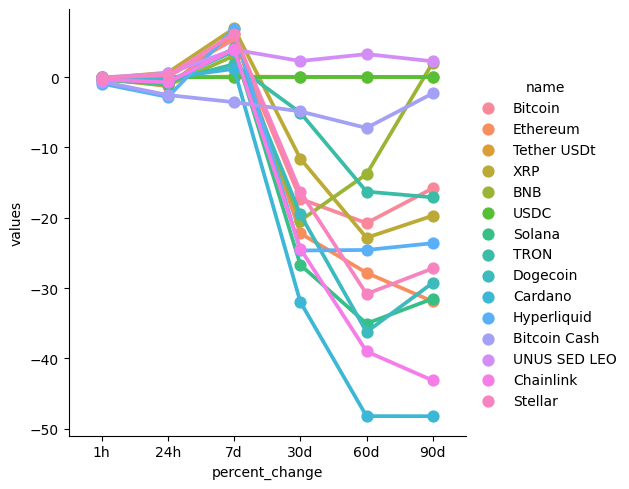

In [38]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [41]:
#dataframe with column we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10.head(5)

name  quote.USD.price                  timestamp
0  Bitcoin      90819.85240 2025-11-30 05:56:40.583786

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

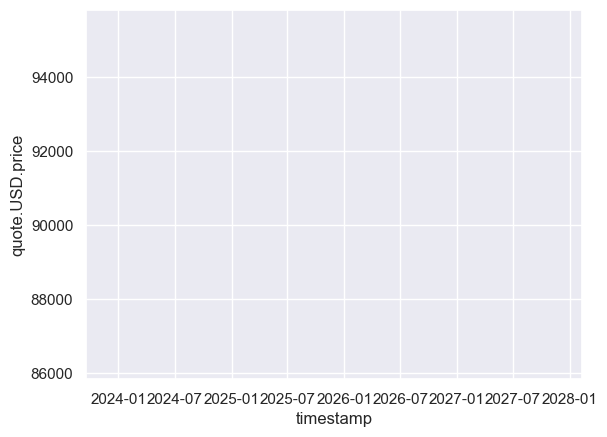

In [42]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)